
Dataset Sample:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

Data after preprocessing:
    mpg  cylinders  displacement     hp    wt   acc  model_year  origin  name
0  18.0          8         307.0  130.0  3504  12.0          70       2    48
1  15.0          8         350.0  165.0  3693  11.5          70       2    35
2

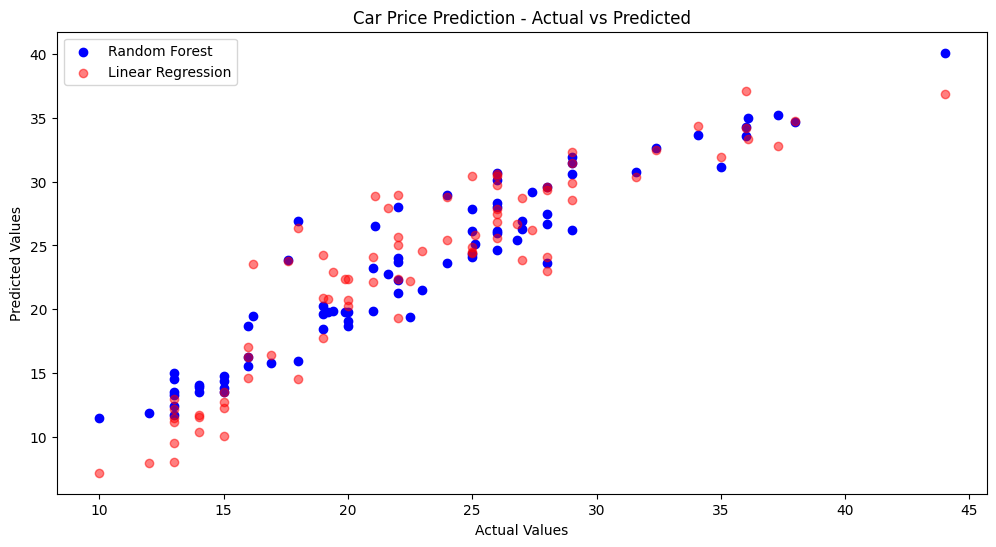


Predicted Car Price (approx MPG proxy): 30.846000000000014


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = sns.load_dataset('mpg')

print("\nDataset Sample:")
print(data.head())

data = data.dropna()

data.rename(columns={"horsepower": "hp", "weight": "wt", "acceleration": "acc"}, inplace=True)

categorical_cols = ["origin", "name"]

for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

print("\nData after preprocessing:")
print(data.head())

X = data.drop(["mpg"], axis=1)
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_rf, color='blue', label="Random Forest")
plt.scatter(y_test, y_pred_lin, color='red', alpha=0.5, label="Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Car Price Prediction - Actual vs Predicted")
plt.show()

new_car = pd.DataFrame({
    'cylinders': [4],
    'displacement': [120],
    'hp': [95],
    'wt': [2500],
    'acc': [15],
    'model_year': [82],
    'origin': [1],
    'name': [10]
})

predicted_price = rf_reg.predict(new_car)
print("\nPredicted Car Price (approx MPG proxy):", predicted_price[0])
